# Yeild prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

### Load and Inspect Data

In [2]:
df=pd.read_csv('crop_production.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


### Datatypes

In [4]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

### Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['State_Name', 'District_Name', 'Season', 'Crop']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
df.dtypes

State_Name         int64
District_Name      int64
Crop_Year          int64
Season             int64
Crop               int64
Area             float64
Production       float64
dtype: object

### checking for Missing Values

In [6]:
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


### Handle Missing Values

In [7]:
df.dropna(subset=['Production'], inplace=True)
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
features = df.drop("Production", axis=1)  
target = df["Production"]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
from sklearn.metrics import mean_squared_error, r2_score
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error (MSE): {mse:.2f}")
    print(f"{model_name} - R-squared (R2): {r2:.2f}\n")


Evaluating Linear Regression...
Linear Regression - Mean Squared Error (MSE): 399775706589347.88
Linear Regression - R-squared (R2): 0.01

Evaluating Decision Tree...
Decision Tree - Mean Squared Error (MSE): 63142759845845.12
Decision Tree - R-squared (R2): 0.84

Evaluating Random Forest...
Random Forest - Mean Squared Error (MSE): 30200985678816.60
Random Forest - R-squared (R2): 0.92

Evaluating Gradient Boosting...
Gradient Boosting - Mean Squared Error (MSE): 106076445424752.30
Gradient Boosting - R-squared (R2): 0.74



### Checking for duplicates

In [9]:
print(df.duplicated().sum())

0


###  Outliers

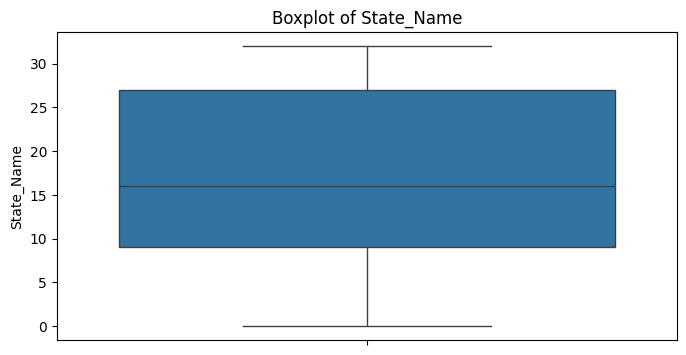

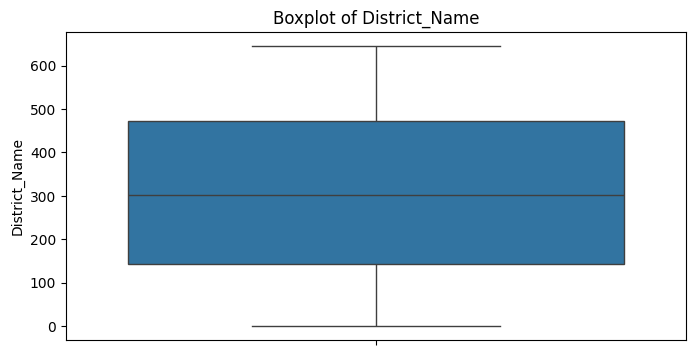

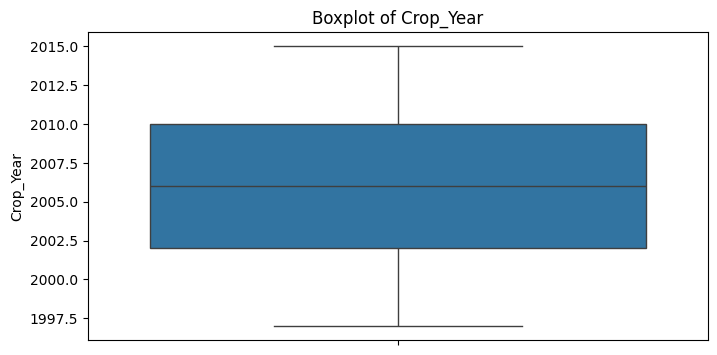

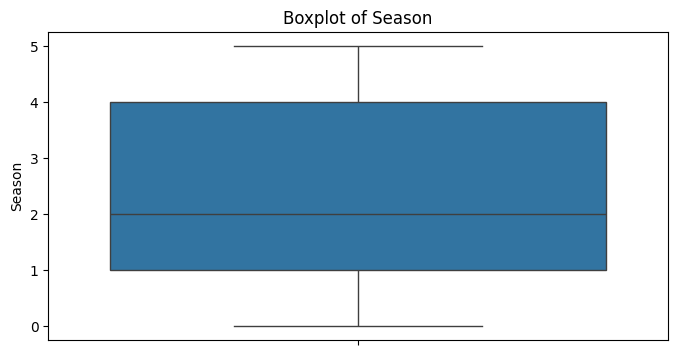

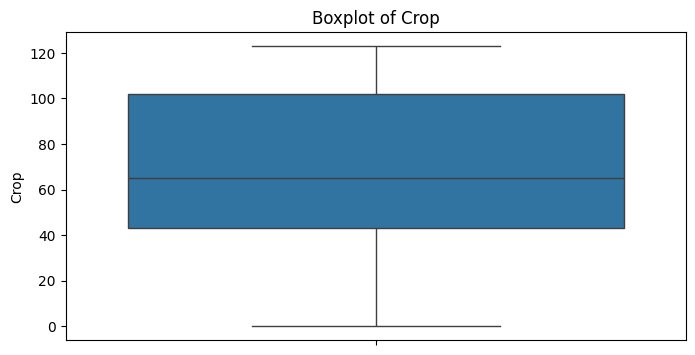

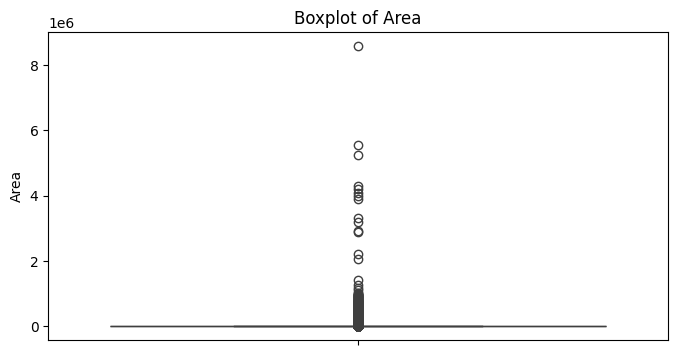

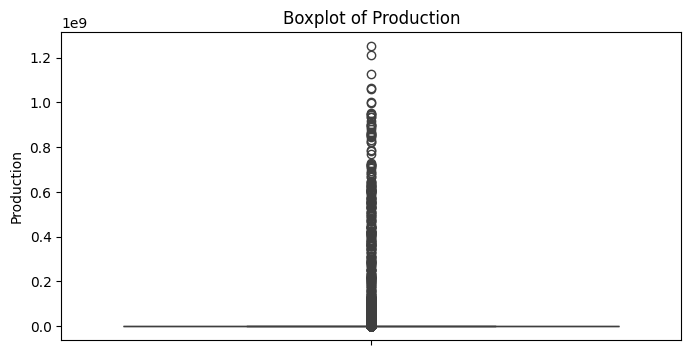

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Removing outliers using zscore

In [11]:
from scipy.stats import zscore
z_scores = df[numeric_cols].apply(zscore)
df = df[(z_scores < 3).all(axis=1)]

### Visualization

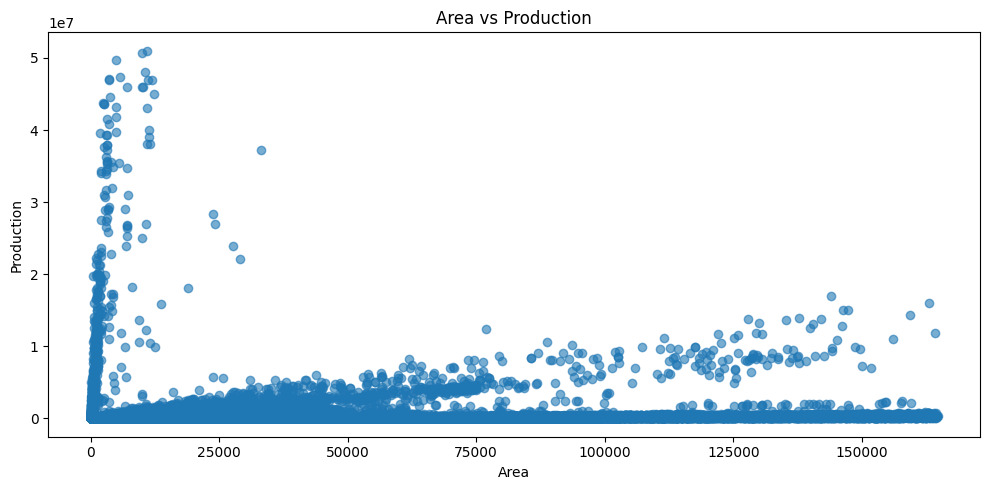

In [28]:
import matplotlib.pyplot as plt
numeric_features = ["Area"]
plt.figure(figsize=(10, 5))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    plt.scatter(df[feature], df["Production"], alpha=0.6)
    plt.title(f"{feature} vs Production")
    plt.xlabel(feature)
    plt.ylabel("Production")
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df, diag_kind="kde", hue="Season", markers="o", palette="husl")
plt.suptitle("Pairplot of Features by Season", y=1.02) 
plt.show()

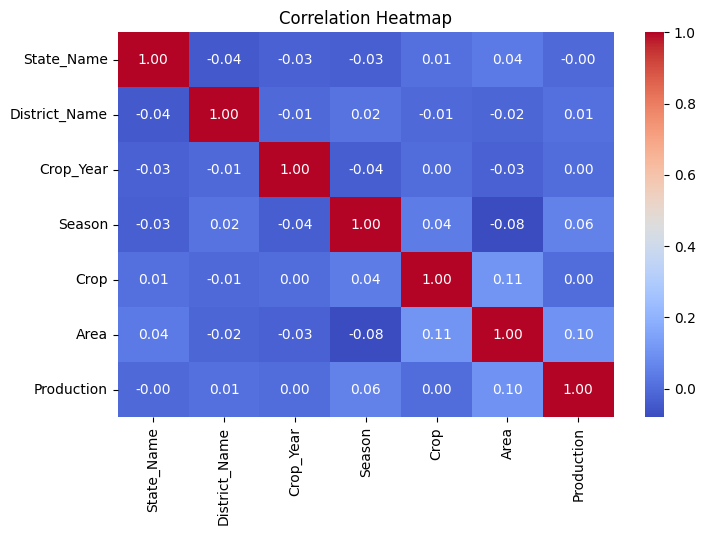

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

### Scaling data

In [15]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
features = df.drop("Production", axis=1)  
target = df["Production"]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
scaled_df["Production"] = target.reset_index(drop=True)
print(scaled_df.head())

   State_Name  District_Name  Crop_Year    Season      Crop      Area  \
0   -1.745067        0.61693  -1.135687 -0.911356 -1.951537 -0.321880   
1   -1.745067        0.61693  -1.135687 -0.911356  0.166533 -0.378527   
2   -1.745067        0.61693  -1.135687 -0.911356  0.784304 -0.374002   
3   -1.745067        0.61693  -1.135687  1.422909 -1.804449 -0.370654   
4   -1.745067        0.61693  -1.135687  1.422909 -1.363184 -0.346041   

   Production  
0      2000.0  
1         1.0  
2       321.0  
3       641.0  
4       165.0  


### Split data

In [16]:
X = scaled_df.drop(columns=['Production']) 
y = scaled_df['Production']
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 166969
Validation set size: 35779
Test set size: 35780


### Import necessary libraries

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

### Define all models

In [18]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor())
]

### Check for training and validation accuracy

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
for model_name, model in models:
    model.fit(X_train, y_train)
    # Predictions on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    # Calculate R² and MSE for both sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    print(f"{model_name} - Training R²: {r2_train}, Validation R²: {r2_val}")
    print(f"{model_name} - Training MSE: {mse_train}, Validation MSE: {mse_val}\n")

Linear Regression - Training R²: 0.014776942617215849, Validation R²: 0.014914205496546429
Linear Regression - Training MSE: 630432192146.5205, Validation MSE: 723711924575.5681

Decision Tree - Training R²: 1.0, Validation R²: 0.915092404068122
Decision Tree - Training MSE: 4.498515762273368e-38, Validation MSE: 62378972477.13146

Random Forest - Training R²: 0.9823130089292857, Validation R²: 0.9299444462967479
Random Forest - Training MSE: 11317689400.009726, Validation MSE: 51467638535.32543

Gradient Boosting - Training R²: 0.4174347460312807, Validation R²: 0.5446044376257095
Gradient Boosting - Training MSE: 372776385383.7631, Validation MSE: 334564969597.5953



#### Evaluting model

In [20]:
best_model = None
best_r2_score = -float('inf') 
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - R²: {r2}")
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = model_name
print(f"\nThe best model is: {best_model} with R² score: {best_r2_score}")

Linear Regression - R²: 0.015870604306223668
Decision Tree - R²: 0.7369041384910524
Random Forest - R²: 0.8005780920874885
Gradient Boosting - R²: 0.4611130334827016

The best model is: Random Forest with R² score: 0.8005780920874885


In [ ]:
df.corr()

### Relating actual and predicted values 

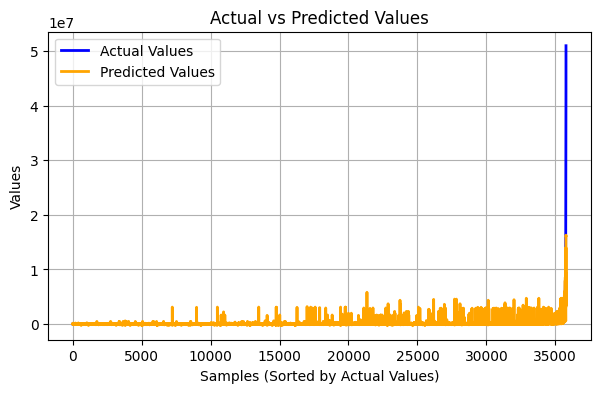

In [21]:
import matplotlib.pyplot as plt
import numpy as np
indices = np.argsort(y_test) 
y_test_sorted = np.array(y_test)[indices]
y_pred_sorted = np.array(y_pred)[indices]
plt.figure(figsize=(7, 4))
plt.plot(y_test_sorted, label="Actual Values", color="blue", linewidth=2)
plt.plot(y_pred_sorted, label="Predicted Values", color="orange", linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples (Sorted by Actual Values)")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

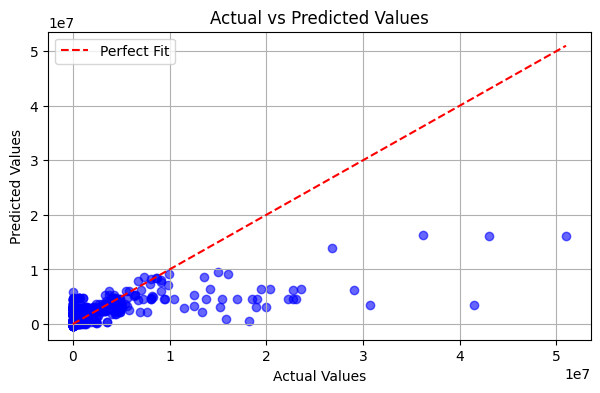

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')  # Diagonal line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Sampling 10% of data for faster hyperparameter tuning
sample_df = df.sample(frac=0.1, random_state=42)
X_sample = sample_df.drop("Production", axis=1)
y_sample = sample_df["Production"]

# Splitting the full dataset and the sampled dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    df.drop("Production", axis=1), df["Production"], test_size=0.2, random_state=42
)
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

# Models to tune
models = {
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "LinearRegression": LinearRegression()
}

# Hyperparameter grids (simplified for speed)
param_grids = {
    "DecisionTree": {
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5]
    },
    "RandomForest": {
        "n_estimators": [50, 100],
        "max_depth": [3, 5],
        "min_samples_split": [2, 5]
    },
    "GradientBoosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5]
    }
}

# Store results
best_models = {}
results = {}

# Perform RandomizedSearchCV for models with sampled data
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    if model_name in param_grids:
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],
            n_iter=5,  # Reduced iterations
            cv=3,  # 3-fold cross-validation
            n_jobs=-1,  # Use all CPU cores
            random_state=42
        )
        search.fit(X_train_sample, y_train_sample)
        best_model = search.best_estimator_
        print(f"Best params for {model_name}: {search.best_params_}")
    else:
        # LinearRegression has no hyperparameters to tune
        best_model = model
        best_model.fit(X_train_sample, y_train_sample)

    # Save the best model
    best_models[model_name] = best_model

    # Evaluate on full test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "R2": r2}

# Print results
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f}")


Tuning DecisionTree...
Best params for DecisionTree: {'min_samples_split': 2, 'max_depth': 3}
Tuning RandomForest...
Best params for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5}
Tuning GradientBoosting...
Best params for GradientBoosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Tuning LinearRegression...

Model Performance:
DecisionTree: MSE = 531693851496.59, R2 = 0.21
RandomForest: MSE = 327353441381.15, R2 = 0.51
GradientBoosting: MSE = 400751069500.15, R2 = 0.41
LinearRegression: MSE = 664301922805.14, R2 = 0.02
